## Q3 - Custom Gradient Descent

In [141]:
import numpy as np
import pandas as pd
from sklearn import *
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

cal_house=fetch_california_housing(as_frame=True)

In [162]:
cal_house_df=cal_house.frame

In [163]:
cal_house_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [164]:


X=cal_house_df.iloc[:,:-1]
Y=cal_house_df.iloc[:,-1]

# Normalizing the features using MinMax Scaler
sc=MinMaxScaler()
X=sc.fit_transform(X)



# Performing the train test split

xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3, random_state=265)

In [187]:
def cost_func(x,y,w,b):
  y_hat=x.dot(w)+b
  cost= np.sum((y-y_hat)**2/(2*len(y)))

  return cost


def LR_SGD(x,y,w,b,alpha,epochs):

  cost_list=np.zeros(epochs)

  iteration=0

  while iteration < epochs:
    cost_list[iteration]=cost_func(x,y,w,b)

    y_hat=x.dot(w)+b
    w_gradient=np.array(x).T.dot(y_hat - y)/len(y)
    b_gradient= np.sum(y_hat - y) / len(y)

    w=w - alpha*w_gradient
    b=b - alpha*b_gradient

    iteration+=1
  
  return w,b,cost_list


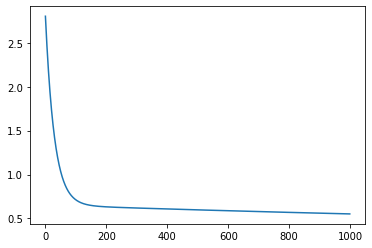

In [191]:
## Running the Gradient Descent function for 1000 iterations and 0.01 learning rate

parameters, constant, cost_list=LR_SGD(xtrain, ytrain, np.zeros(xtrain.shape[1]),0,0.01,1000)

plt.plot(cost_list)

### Final MSE after 1000 iterations on training data

In [190]:
cost_list[999]

0.5510468649429558

### g) Parameters which give lowest MSE

In [167]:
list(parameters)

[1.232148071100124,
 0.6306597561349819,
 0.06879554535220726,
 0.02176001232307622,
 0.050100912161522265,
 -0.0005110809558964187,
 0.11583731760608401,
 0.40728025046974525]

In [198]:
constant

1.2032648466815945

### h) Thus we see that the first two factors which have the highest weight. i.e. MedInc and HouseInc are the factors that explain house prices the most

In [184]:


def prediction(X,w,b):
  return X.dot(w) + b

y_prediction=prediction(xtest,parameters,constant)

### MSE of Test Data

In [197]:
def MSE(y_pred,y):
  mse=np.sum((y_prediction-y)**2/(2*len(y)))

  return mse

MSE(y_prediction,ytest)

0.5447397692968704

### R2 Score on Test Data

In [185]:
def r2(y_prediction,y):

  rss=np.sum((y_prediction-y)**2)

  tss=np.sum((y - y.mean())**2)

  r2= 1 - (rss/tss)

  return r2

r2_score=r2(y_prediction,ytest)

In [186]:
r2_score

0.17291324132930674